In [1]:
from qiskit import QuantumCircuit
from qiskit import IBMQ
from qiskit import transpile
import numpy as np
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.providers.aer import AerSimulator

In [2]:
from qiskit import Aer
sv_sim = Aer.get_backend('aer_simulator')

In [3]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
nairobi = provider.get_backend('ibmq_manila')

In [4]:
manila_sim = AerSimulator.from_backend(nairobi)

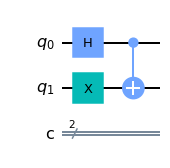

In [5]:
initialize = QuantumCircuit(2, 2)

#Hadmard gate on
initialize.x(1)
initialize.h(0)
#cnot gate on 0 and 1
initialize.cx(0, 1)
#draw the circuit
initialize.draw('mpl')

In [6]:
rotation_circuits = []

rotatexy45 = QuantumCircuit(2, 2)
rotatexy45.ry(np.pi/4, 0)
rotation_circuits.append(rotatexy45)


rotatexz45 = QuantumCircuit(2, 2)
rotatexz45.ry(np.pi/4, 0)
rotatexz45.h(1)
rotation_circuits.append(rotatexz45)

rotateyz90 = QuantumCircuit(2, 2)
rotateyz90.ry(np.pi/4, 0)
rotateyz90.h(0)
rotation_circuits.append(rotateyz90)

rotatexy60 = QuantumCircuit(2, 2)
rotatexy60.ry(np.pi/4, 0)
rotatexy60.h(0)
rotatexy60.h(1)
rotation_circuits.append(rotatexy60)

rotation_circuits[0].draw()

┌─────────┐
q_0: ┤ Ry(π/4) ├
     └─────────┘
q_1: ───────────
                
c: 2/═══════════

In [7]:
meas = QuantumCircuit(2, 2)
meas.barrier(range(2))
#add z measurement
meas.measure(range(2), range(2))
meas.draw()

# The Qiskit circuit object supports composition using
# the addition operator.
# print(meas.cregs[0])
# qc = circ.compose(meas)

#drawing the circuit
#qc.draw()

░ ┌─┐   
q_0: ─░─┤M├───
      ░ └╥┘┌─┐
q_1: ─░──╫─┤M├
      ░  ║ └╥┘
c: 2/════╩══╩═
         0  1

In [8]:
#build circuits
quantum_circuits = []
for rot in rotation_circuits:
#     circuit = QuantumCircuit(2, 2)
#     circuit.compose(initialize)
#     circuit.compose(rot)
#     circuit.compose(meas)
    circuit = initialize + rot + meas
    quantum_circuits.append(circuit)
    circuit.draw()
    

C:\Users\ahoyt\AppData\Local\Temp\ipykernel_18572\709763331.py:8: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circuit = initialize + rot + meas


In [17]:
quantum_circuits[3].draw()

┌───┐     ┌─────────┐┌───┐ ░ ┌─┐   
q_0: ┤ H ├──■──┤ Ry(π/4) ├┤ H ├─░─┤M├───
     ├───┤┌─┴─┐└──┬───┬──┘└───┘ ░ └╥┘┌─┐
q_1: ┤ X ├┤ X ├───┤ H ├─────────░──╫─┤M├
     └───┘└───┘   └───┘         ░  ║ └╥┘
c: 2/══════════════════════════════╩══╩═
                                   0  1

In [10]:
# Use Aer's qasm_simulator

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = manila_sim.run(transpile(quantum_circuits, manila_sim), shots=20000)

# job_real = quito.run(transpile(quantum_circuits, quito), shots=20000)
# job_monitor(job_real)

# Grab the results from the job.
result_sim = job_sim.result()
# result_real = job_real.result()

sim:
-2.5439
maximum:
2.8284271247461903


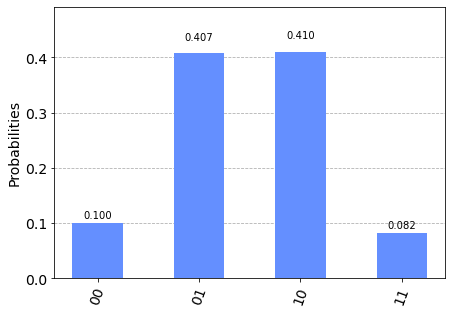

In [11]:
from qiskit.visualization import plot_histogram
def calc_chsh(theta_dict):
    zz = theta_dict[0]
    zx = theta_dict[1]
    xz = theta_dict[3]
    xx = theta_dict[2]
    
    no_shots = sum(xx[y] for y in xx)

    chsh1 = 0
    chsh2 = 0

    for element in zz:
        parity = (-1)**(int(element[0])+int(element[1]))
        chsh1+= parity*zz[element]
        chsh2+= parity*zz[element]

    for element in zx:
        parity = (-1)**(int(element[0])+int(element[1]))
        chsh1+= parity*zx[element]
        chsh2-= parity*zx[element]

    for element in xz:
        parity = (-1)**(int(element[0])+int(element[1]))
        chsh1-= parity*xz[element]
        chsh2+= parity*xz[element]

    for element in xx:
        parity = (-1)**(int(element[0])+int(element[1]))
        chsh1+= parity*xx[element]
        chsh2+= parity*xx[element]
    
    return chsh1 / no_shots


print("sim:")
print(calc_chsh(result_sim.get_counts()))
# print("real:")
# print(calc_chsh(result_real.get_counts()))
print("maximum:")
print(2*np.sqrt(2))
plot_histogram(result_sim.get_counts()[2:3])

In [12]:
import qiskit.tools.jupyter
%qiskit_version_table
